In [146]:
import pandas as pd

In [147]:
manhattan = pd.read_csv('/Users/solangelpereyra-lagares/Documents/DS0110 - Final Project/Choosing Data/manhattan.csv')

In [148]:
manhattan.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


In [149]:
manhattan1 = manhattan[['rent', 'neighborhood', 'bedrooms', 'floor']]

In [150]:
manhattan1

,rent,neighborhood,bedrooms,floor
0,2550,Upper East Side,0.0,2.0
1,11500,Greenwich Village,2.0,1.0
2,4500,Midtown,1.0,51.0
3,4795,Greenwich Village,1.0,8.0
4,17500,Soho,2.0,4.0
...,...,...,...,...
3534,4210,Chelsea,1.0,8.0
3535,6675,Tribeca,2.0,10.0
3536,1699,Little Italy,0.0,5.0
3537,3475,Midtown West,1.0,5.0


<AxesSubplot:>

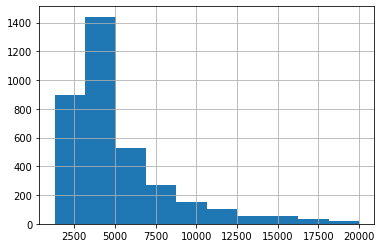

In [151]:
manhattan1.rent.hist()

In [152]:
import seaborn as sns

/usr/local/Cellar/jupyterlab/3.3.2/libexec/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rent', ylabel='Density'>

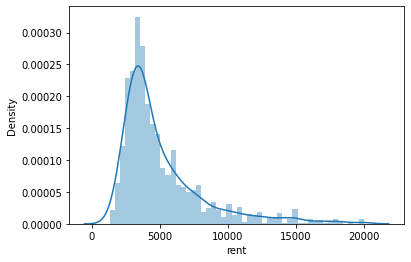

In [153]:
sns.distplot(manhattan1['rent'])

In [154]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

Text(0, 0.5, 'Neighborhood')

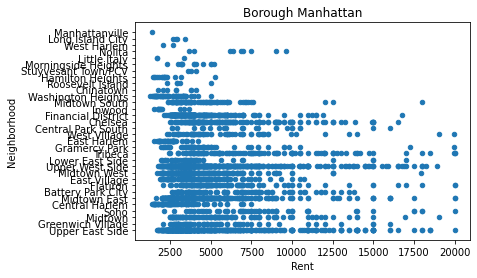

In [155]:
Plot = manhattan1.plot.scatter(x='rent', y='neighborhood')
Plot.set_title("Borough Manhattan")
Plot.set_xlabel("Rent")
Plot.set_ylabel("Neighborhood")

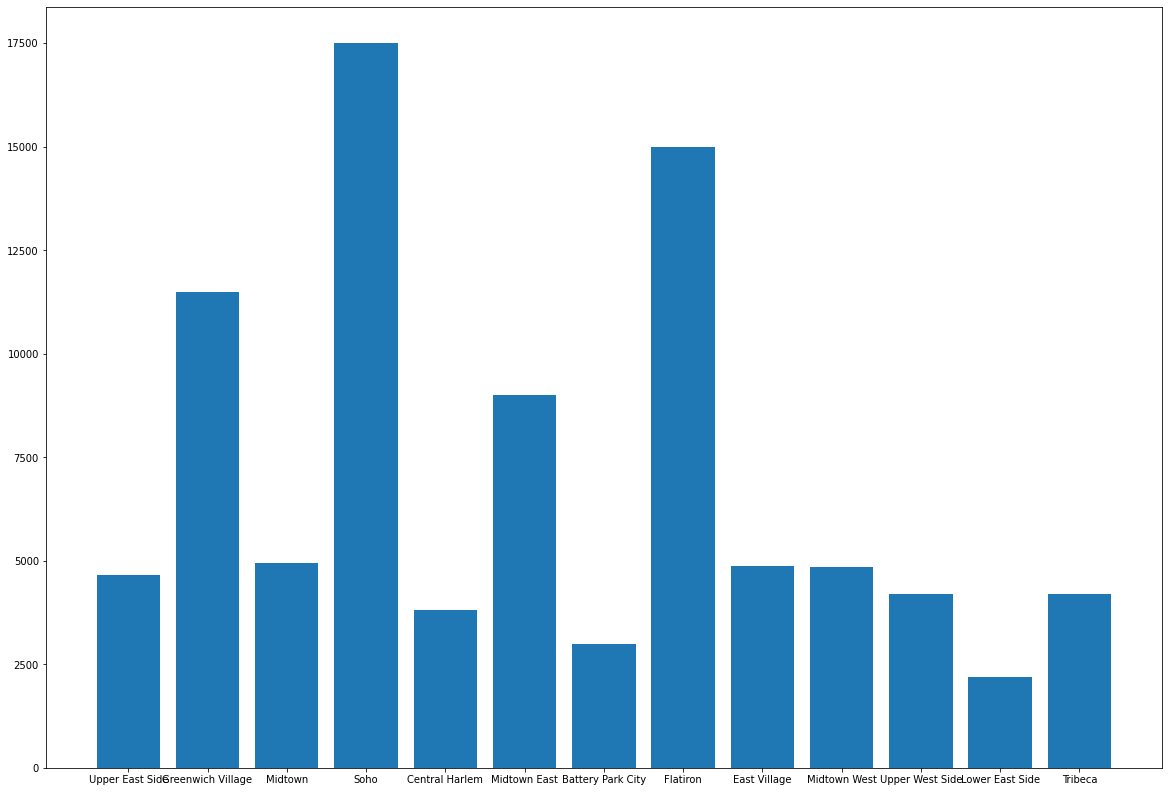

In [156]:
apt = manhattan1['neighborhood'].head(24)
price = manhattan1['rent'].head(24)
fig = plt.figure(figsize = (20, 14))
plt.bar(apt[0:20], price[0:20])
plt.show()

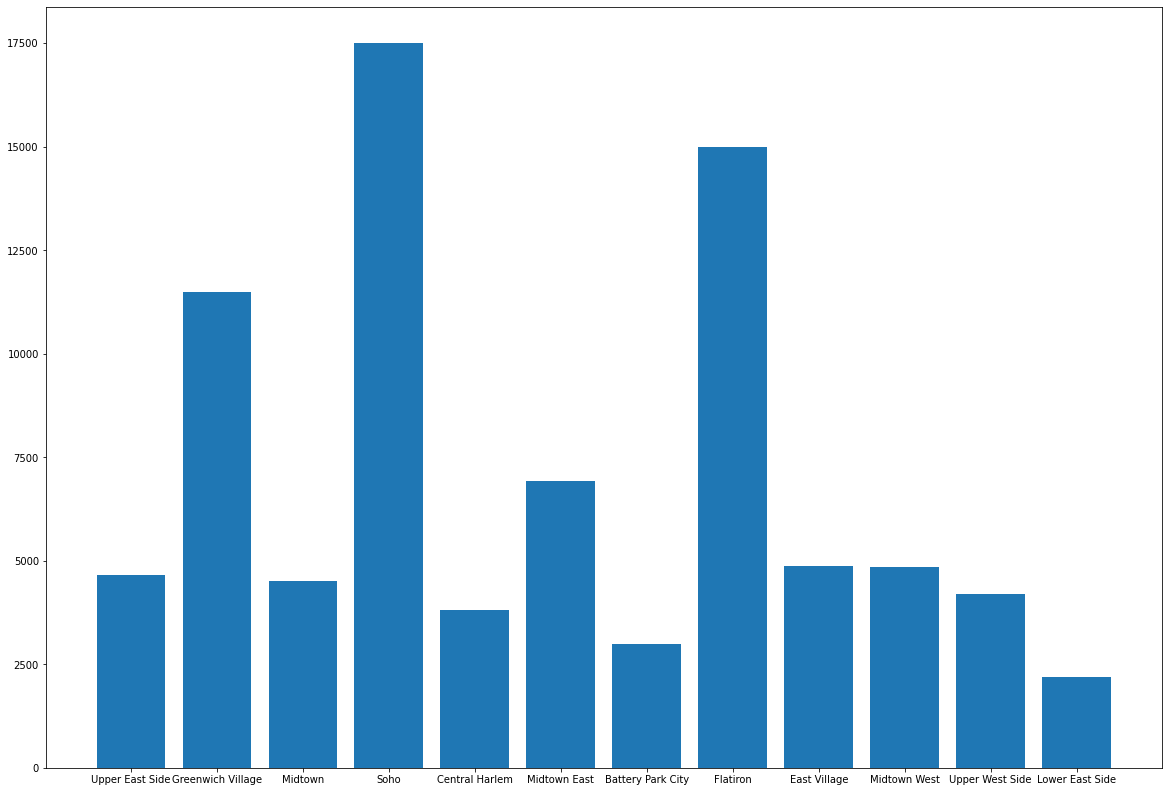

In [157]:
apt = manhattan1['neighborhood'].head(50)
price = manhattan1['rent'].head(50)
fig = plt.figure(figsize = (20, 14))
plt.bar(apt[0:17], price[0:17])
plt.show()

In [158]:
import numpy as np
import scipy
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [160]:
#Basic One-Way Anova 

In [161]:
area = ['Battery Park City', 'Central Harlem', 'Central Park South', 'Chelsea', 'Chinatown', 'East Harlem', 'East Village', 'Financial District']
manhattan3 = manhattan['neighborhood'].isin(area)
manhattan4 = manhattan[manhattan3].copy()

In [162]:
#The data has 32 neighborhood. I filtered the dataset to 8 neighborhoods I wanted to use. 

In [163]:
manhattan5 = manhattan4[['neighborhood','rent']]

In [164]:
#Subsetting the only variables needed. Keeping the only variables I need for my test.

In [166]:
manhattan5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 5 to 3534
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   neighborhood  816 non-null    object
 1   rent          816 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 19.1+ KB


In [167]:
#Running a .info() function to see if my dependent variable is an int. 

In [168]:
def recode (series):
    if series == "Battery Park City": 
        return 0
    if series == "Central Harlem": 
        return 1
    if series == "Central Park South": 
        return 2
    if series == "Chelsea":
        return 3
    if series == "Chinatown":
        return 4
    if series == "East Harlem":
        return 5
    if series == "East Village":
        return 6
    if series == "Financial District":
        return 7

manhattan5['neighborhoodR'] = manhattan5['neighborhood'].apply(recode)

/var/folders/wc/v1m4qtgx38x71_rp2q7kknx40000gn/T/ipykernel_42541/855886330.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manhattan5['neighborhoodR'] = manhattan5['neighborhood'].apply(recode)


In [169]:
#Recoded my neighborhoods to numbers, due to post-hocs and assumptions won't take string values.

In [170]:
manhattan5.head()

,neighborhood,rent,neighborhoodR
5,Central Harlem,3800,1
7,Battery Park City,2995,0
12,East Village,4875,6
21,Central Harlem,2450,1
24,East Harlem,2395,5


In [173]:
manhattan6 = manhattan5[['neighborhoodR','rent']]

In [174]:
#Dropped the neighborhood column to keep the 2 varibles needed for my test.

In [175]:
manhattan6.head()

,neighborhoodR,rent
5,1,3800
7,0,2995
12,6,4875
21,1,2450
24,5,2395


/usr/local/Cellar/jupyterlab/3.3.2/libexec/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rent', ylabel='Density'>

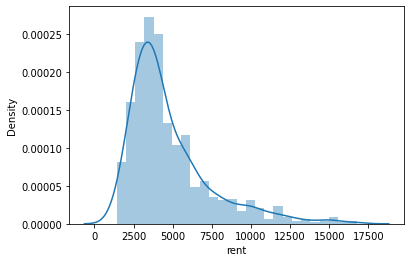

In [176]:
sns.distplot(manhattan6['rent'])

In [177]:
#Running a Test Assumption to test the Normality of the dependent variable (rent).

In [181]:
manhattan6['rentSQRT'] = np.sqrt(manhattan6['rent'])

In [184]:
#Homogeneity of Variance(looking for the non-significant test)

In [185]:
scipy.stats.bartlett(manhattan6['rentSQRT'], manhattan6['neighborhoodR'])

BartlettResult(statistic=1971.5502687807902, pvalue=0.0)

In [186]:
#The Barlett Test is for when the data is normally distributed. 
#The p-value is <.05 meaning I have violated the assumption of Homogeneity of Variance.

In [187]:
scipy.stats.fligner(manhattan6['rentSQRT'], manhattan6['neighborhoodR'])

FlignerResult(statistic=605.2621964720422, pvalue=1.2001559406290343e-133)

In [188]:
#The Fligner's Test is for when the data is non-parametric. 
#The p-value is < .05 meaning the assumption for Homogeneity was violated again.

In [189]:
stats.f_oneway(manhattan['rent'][manhattan['neighborhood']=='Battery Park City'],
                    manhattan['rent'][manhattan['neighborhood']=='Central Harlem'],
                    manhattan['rent'][manhattan['neighborhood']=='Central Park South'],
                    manhattan['rent'][manhattan['neighborhood']=='Chelsea'],
                    manhattan['rent'][manhattan['neighborhood']=='Chinatown'],
                    manhattan['rent'][manhattan['neighborhood']=='East Harlem'],
                    manhattan['rent'][manhattan['neighborhood']=='East Village'],
                    manhattan['rent'][manhattan['neighborhood']=='Financial District'])

F_onewayResult(statistic=34.25522448326238, pvalue=6.470939839652402e-42)

In [190]:
#Computing ANOVAs with Equal Variance (Met Homogeneity of Variance Assumption)

In [191]:
postHoc = MultiComparison(manhattan6['rentSQRT'], manhattan6['neighborhoodR'])
postHocResults = postHoc.tukeyhsd()
print(postHocResults)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
     0      1 -21.8896    0.0 -28.4831 -15.2961   True
     0      2   9.1569 0.1225  -1.1304  19.4443  False
     0      3   1.5887 0.9878  -3.8993   7.0767  False
     0      4 -21.2661 0.0022 -37.6467  -4.8856   True
     0      5 -25.4162    0.0 -33.6492 -17.1832   True
     0      6 -10.9924    0.0 -17.1261  -4.8587   True
     0      7 -10.9435    0.0 -16.1014  -5.7857   True
     1      2  31.0465    0.0  20.5122  41.5808   True
     1      3  23.4783    0.0  17.5403  29.4163   True
     1      4   0.6234    1.0 -15.9134  17.1602  False
     1      5  -3.5266 0.9148 -12.0662    5.013  False
     1      6  10.8972    0.0   4.3578  17.4366   True
     1      7   10.946    0.0   5.3117  16.5804   True
     2      3  -7.5682 0.2797 -17.4483   2.3118  False
     2      4 -30.4231    0.0 -48.7485 -12.0977   True
     2    

In [192]:
#Computing ANOVAs with Unequal Variance (Violated Homogeneity of Variance Assumption) 
#post-hocs to figure out what groups significantly differed from each other.
#In the reject column is True, then this means there was a significant difference in the means between those groups.

In [193]:
manhattan6.groupby('neighborhoodR').mean()

,rent,rentSQRT
neighborhoodR,,
0,5968.961538,75.094335
1,2963.926829,53.204756
2,7506.956522,84.251282
3,6193.483516,76.683039
4,2955.625000,53.828187
5,2502.000000,49.678146
6,4304.361111,64.101946
7,4263.925373,64.150791


In [194]:
#Examined the means, to determine which neighborhhod had the significant number of higher rent. Looking at the rent 
#column which has the means you can see Central Park South has the significant higher rents.